In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Updload dataset and visualize first 5 rows
raw_data = pd.read_csv('Traffic.csv')
raw_data.head(5)

,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
0,2010,Zona urbana,25/01/2010,SE,999999.0,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,99.9,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,07/05/2010,SE,999999.0,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div


In [4]:
# Analize content as nans, cols info

columns_name = raw_data.columns.values

print(f'The columns from the Traffic dataset are {columns_name}')

raw_data.info()

The columns from the Traffic dataset are ['Year' 'Area' 'Date ' 'Road ' 'Kilometer Point' 'Municipality Name '
 'County Name ' 'Province Name ' 'Fatalties' 'Serious Injuries '
 'Light Injuries ' 'Total Victims ' 'Units Involved '
 'Pedestrains Involved' 'Bicycles Involved' 'Mopeds Involved'
 'Motorcycles' 'Light Vehicles Involved ' 'Heavy Vehicles Involved'
 'Other Units Involved' 'Unspecified Units Involved' 'Road Speed Limit'
 'Accident with Hit and Run' 'Fog Presence ' 'Surrounding Environment'
 'Special Lane Presence' 'Special Traffic Measures' 'Weather Conditions '
 'Special Road Functions ' 'Severity of Accident ' 'Influence of Fog '
 'Influence of Environment' 'Influence of Traffic' 'Influence of Weather'
 'Influence of Wind Intensity ' 'Influence of Lighting'
 'Influence of Special Measures' 'Influence of Road Objects'
 'Influence of Road Surface ' 'Influence of Visibility '
 'Intersection Characteristics ' 'Speed Limit Information'
 'Lighting Conditions ' 'Traffic Regulation a

In [5]:
# General Trends
# What are the overall trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010-2021?

# Columns Names that we will use: 'Year', 'Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims '

accidents = raw_data[['Year','Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims ']].groupby('Year').sum()

accidents.head(5)

,Fatalties,Serious Injuries,Light Injuries,Total Victims
Year,,,,
2010,339,2007,883,3229
2011,280,1866,757,2903
2012,274,1980,879,3133
2013,232,1901,752,2885
2014,230,1888,760,2878


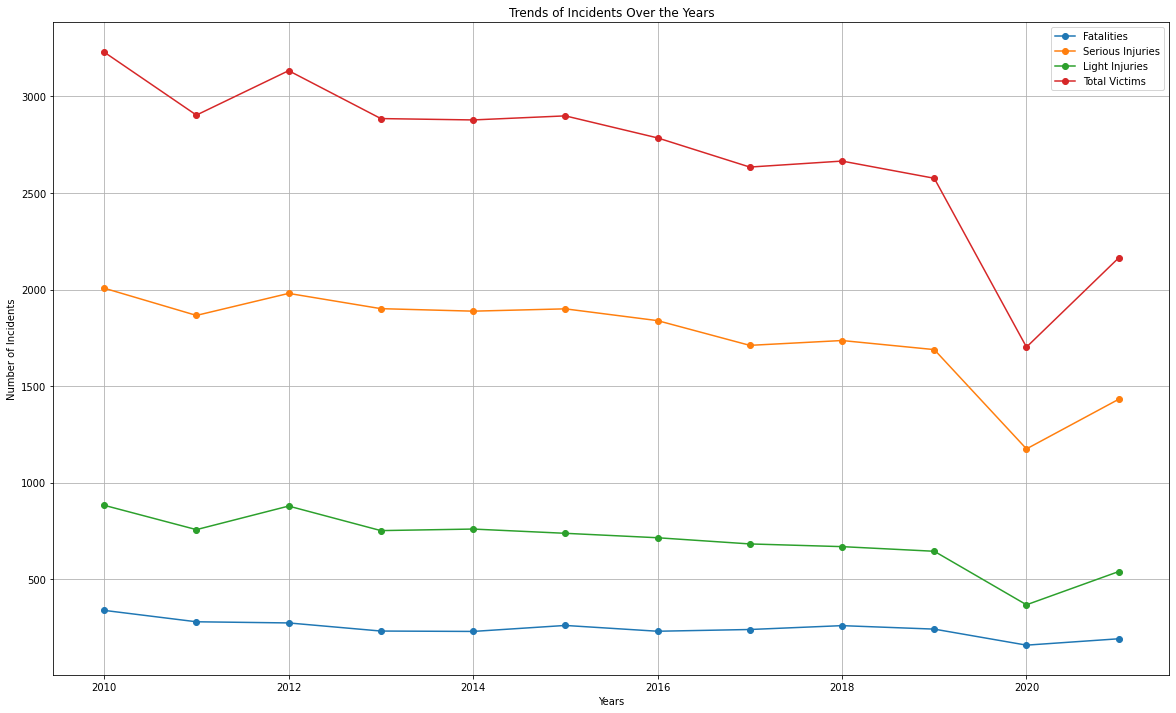

In [6]:
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

# Plotting each trend
plt.plot(accidents.index, accidents['Fatalties'], label='Fatalities', marker='o')
plt.plot(accidents.index, accidents['Serious Injuries '], label='Serious Injuries', marker='o')
plt.plot(accidents.index, accidents['Light Injuries '], label='Light Injuries', marker='o')
plt.plot(accidents.index, accidents['Total Victims '], label='Total Victims', marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Number of Incidents')
plt.title('Trends of Incidents Over the Years')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [26]:
"""
The trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010 to 2021 
indicate a consistent overall downward trajectory, suggesting improvements in road safety measures
or changes in driving behavior. Notably, the year 2020 stands out with a significant decrease, 
attributed to the impact of the COVID-19 pandemic and associated quarantine measures. Fatalities 
exhibit a more linear decline, possibly influenced by advancements in car safety systems. However, 
the slower decrease in fatalities compared to other indicators hints at a shift, where incidents that
might have resulted in fatalities are now being categorized as injuries, reflecting the evolution of 
safety technology. Overall, the data underscores positive advancements in road safety, though the exceptional
circumstances of 2020 should be considered when assessing the trends.
"""

'\n\nThe trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010 to 2021 \nindicate a consistent overall downward trajectory, suggesting improvements in road safety measures\nor changes in driving behavior. Notably, the year 2020 stands out with a significant decrease, \nattributed to the impact of the COVID-19 pandemic and associated quarantine measures. Fatalities \nexhibit a more linear decline, possibly influenced by advancements in car safety systems. However, \nthe slower decrease in fatalities compared to other indicators hints at a shift, where incidents that\nmight have resulted in fatalities are now being categorized as injuries, reflecting the evolution of \nsafety technology. Overall, the data underscores positive advancements in road safety, though the exceptional\ncircumstances of 2020 should be considered when assessing the trends.\n'

In [9]:
# Accidents Characteristics
# What common characteristics (time of day, type of road, etc.) are observed in the most severe accidents?

# We assume that the most severe accidents are those ones where the Severity shows fatality, since
# a fatality might be considered the worst outcome from an accident

most_severe_accidents = raw_data[raw_data['Severity of Accident '] == 'Accident mortal']
most_severe_accidents.head(3)

,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
2,2010,Carretera,17/05/2010,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
7,2010,Zona urbana,23/10/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,1,0,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,10.55,Matí,Atropellament,dis
18,2010,Zona urbana,02/07/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,1,0,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,16.40,Tarda,Atropellament,div


In [33]:
#- Col names: 
columns_severity = ['Date ', 'Units Involved ', 'Weather Conditions ',
'Type of Road', 'Road Speed Limit', 'Road Ownership ',
 'Wind Conditions ', 'Lighting Conditions ', 'Day of the Week Grouping ',
 'Hour of Day', 'Time of Day Grouping ', 'Type of Accident ',
 'Day Type']

raw_data['Date '] = pd.to_datetime(raw_data['Date '], format='%d/%m/%Y', dayfirst=True)
characteristics_msa = raw_data[columns_severity]
#characteristics_msa['Date '] = pd.to_datetime(characteristics_msa['Date '], format='%d/%m/%y')
characteristics_msa['Day of Week'] = characteristics_msa['Date '].dt.day_name()
characteristics_msa['Month'] = characteristics_msa['Date '].dt.month_name()

characteristics_msa.head(5)

C:\Users\marcl\AppData\Local\Temp\ipykernel_12784\451092251.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characteristics_msa['Day of Week'] = characteristics_msa['Date '].dt.day_name()
C:\Users\marcl\AppData\Local\Temp\ipykernel_12784\451092251.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characteristics_msa['Month'] = characteristics_msa['Date '].dt.month_name()


,Date,Units Involved,Weather Conditions,Type of Road,Road Speed Limit,Road Ownership,Wind Conditions,Lighting Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type,Day of Week,Month
0,2010-01-25,2,Bon temps,Via urbana( inclou carrer i carrer residencial),100.0,NaN,"Calma, vent molt suau","De nit, il·luminació artificial suficient",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij,Monday,January
1,2010-10-31,1,Bon temps,Carretera convencional,40.0,Estatal,"Calma, vent molt suau","De nit, il·luminació artificial suficient",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg,Sunday,October
2,2010-05-17,4,Bon temps,Carretera convencional,80.0,Estatal,"Calma, vent molt suau","De dia, dia clar",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij,Monday,May
3,2010-08-21,2,Bon temps,Via urbana( inclou carrer i carrer residencial),100.0,NaN,"Calma, vent molt suau","De nit, il·luminació artificial suficient",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis,Saturday,August
4,2010-05-07,1,Bon temps,Via urbana( inclou carrer i carrer residencial),100.0,NaN,"Calma, vent molt suau","De dia, dia clar",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div,Friday,May


In [80]:
units_involved = characteristics_msa.groupby('Units Involved ').size().reset_index(name='Events Count')
weather = characteristics_msa.groupby('Weather Conditions ').size().reset_index(name='Events Count')
road = characteristics_msa.groupby('Type of Road').size().reset_index(name='Events Count')
speed = characteristics_msa.groupby('Road Speed Limit').size().reset_index(name='Events Count')
owner = characteristics_msa.groupby('Road Ownership ').size().reset_index(name='Events Count')
light = characteristics_msa.groupby('Lighting Conditions ').size().reset_index(name='Events Count')
dow_grouping = characteristics_msa.groupby('Day of the Week Grouping ').size().reset_index(name='Events Count')
time = characteristics_msa.groupby('Time of Day Grouping ').size().reset_index(name='Events Count')
type_of_accident = characteristics_msa.groupby('Type of Accident ').size().reset_index(name='Events Count')
day = characteristics_msa.groupby('Day of Week').size().reset_index(name='Events Count')
month = characteristics_msa.groupby('Month').size().reset_index(name='Events Count')



In [82]:
time_order = ['Matí', 'Tarda', 'Nit']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

time['Time of Day Grouping '] = pd.Categorical(time['Time of Day Grouping '], categories=time_order, ordered=True)
time.sort_values(by='Time of Day Grouping ', inplace=True)

day['Day of Week'] = pd.Categorical(day['Day of Week'], categories=day_order, ordered=True)
day.sort_values(by='Day of Week', inplace=True)

month['Month'] = pd.Categorical(month['Month'], categories=month_order, ordered=True)
month.sort_values(by='Month', inplace=True)

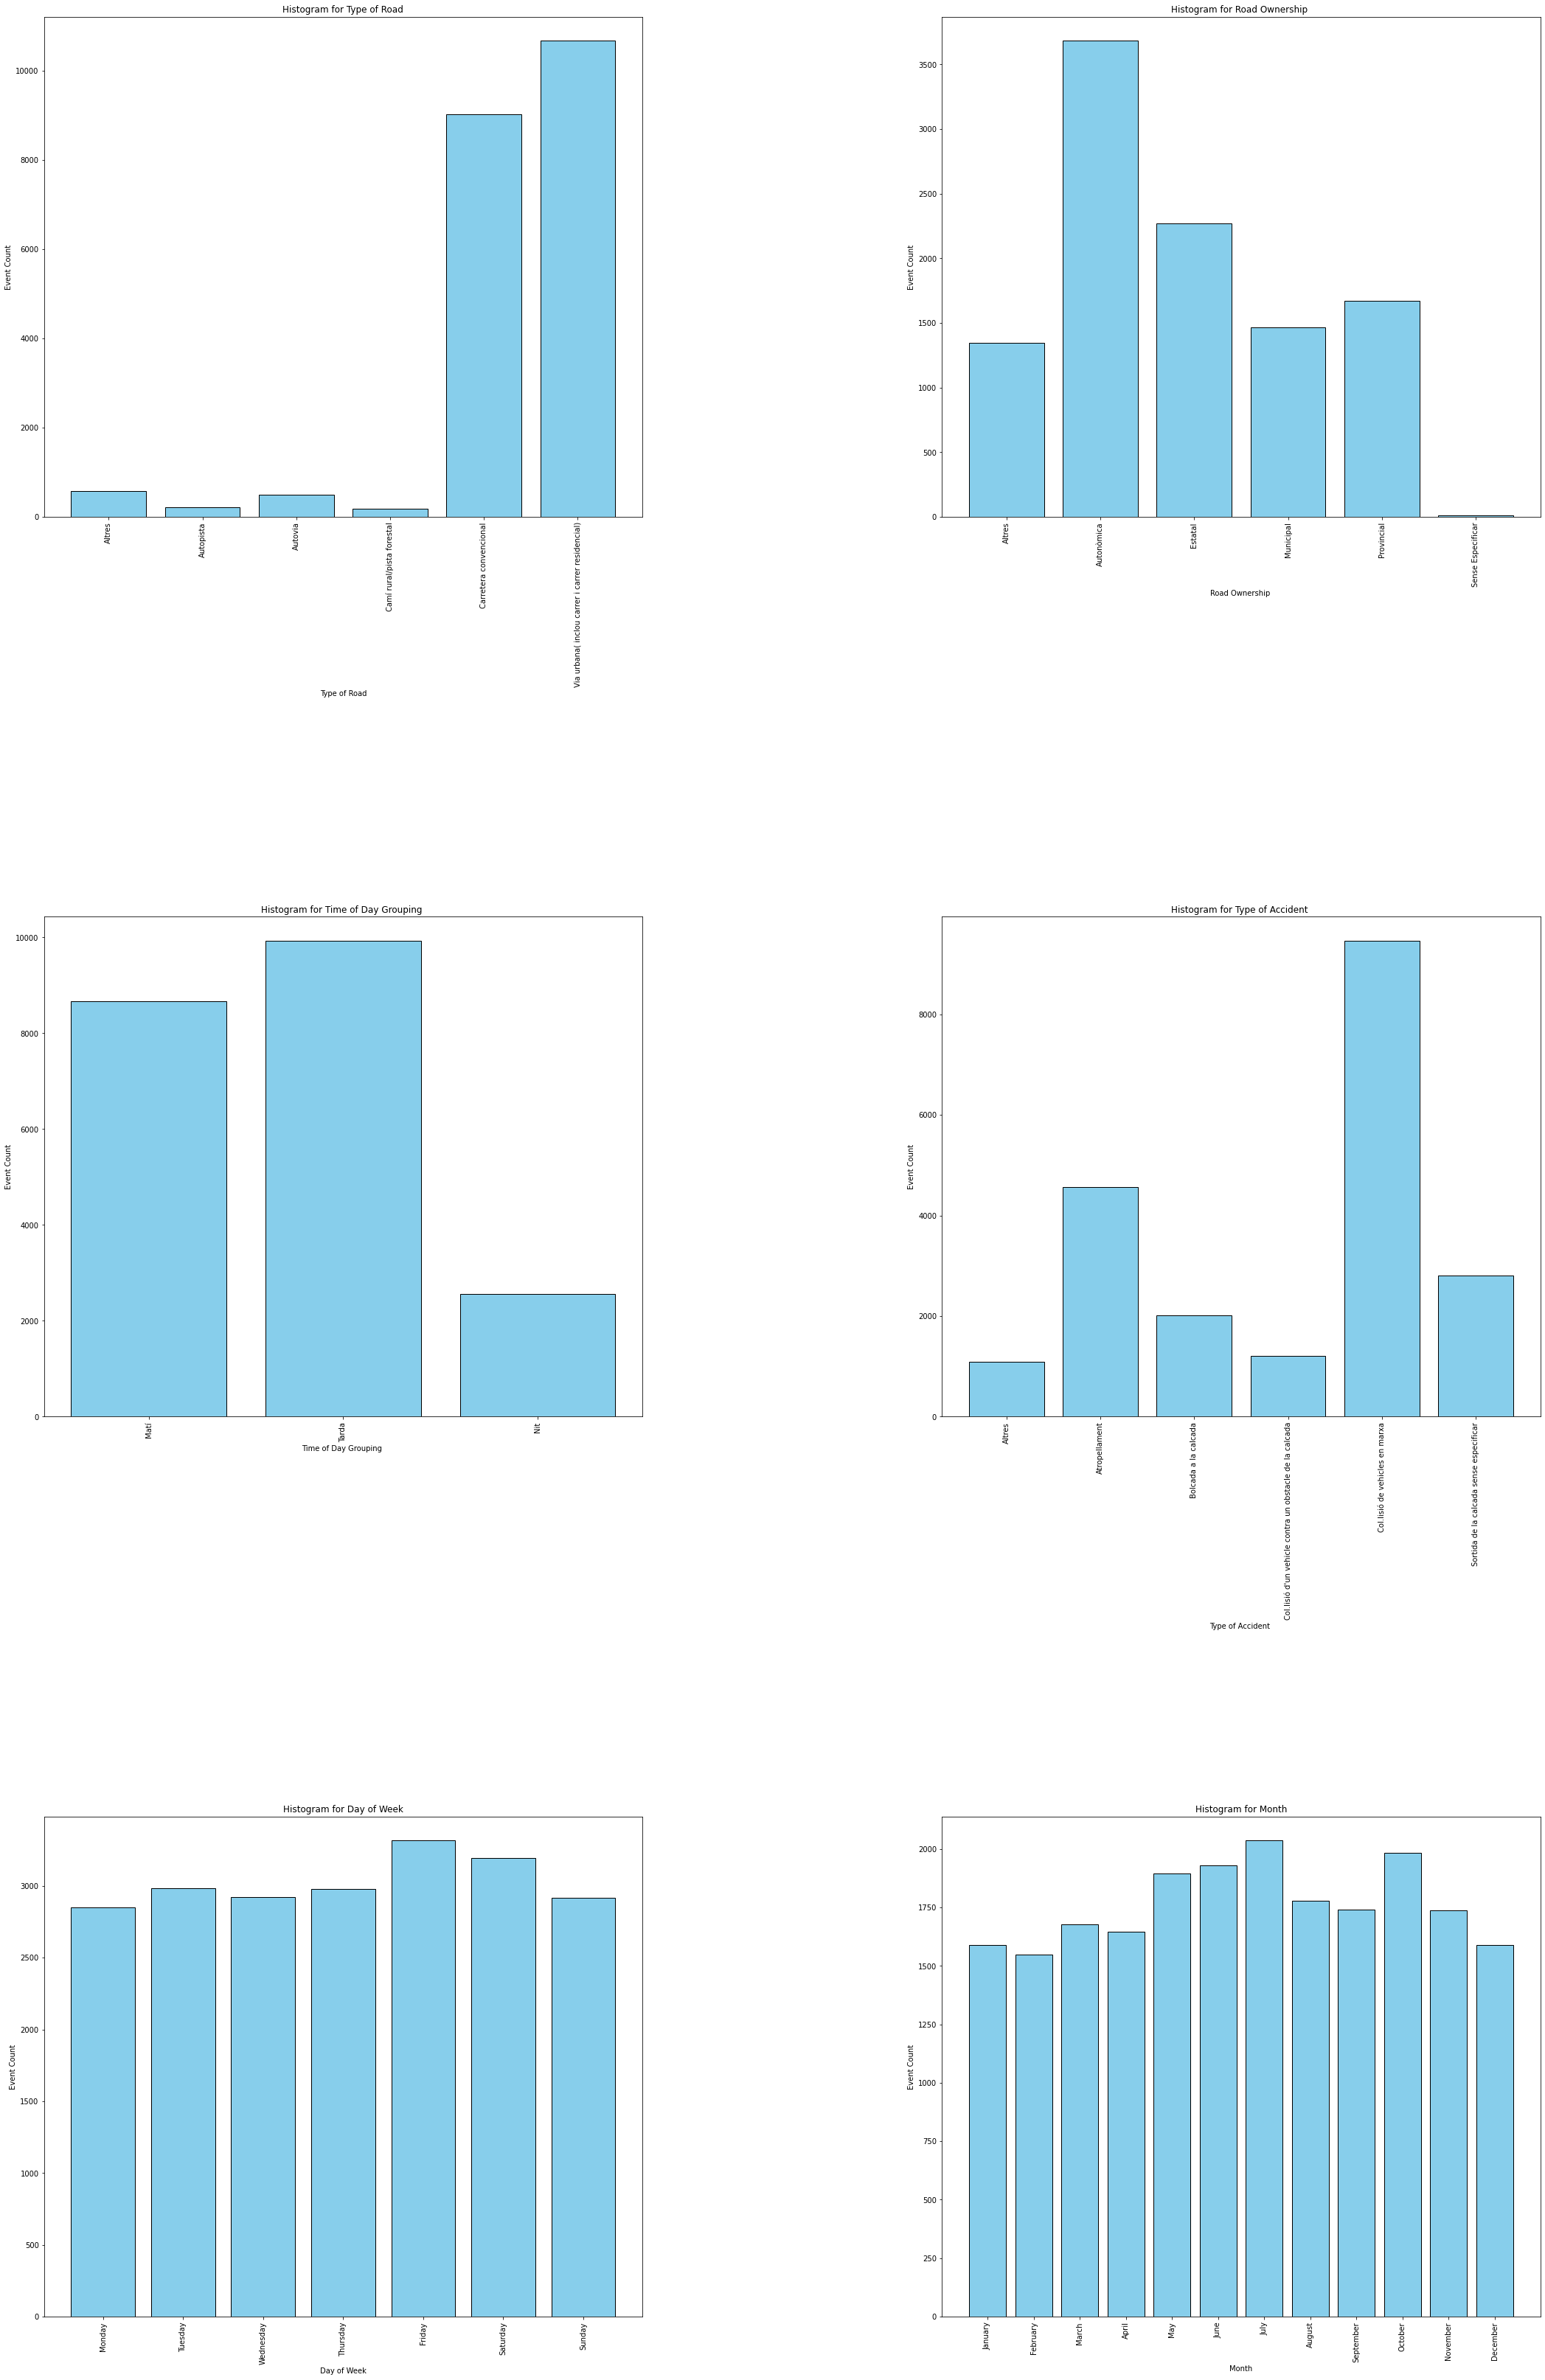

In [98]:
grouped_datasets = [road, owner, time, 
                    type_of_accident, day, month]
column_names = ['Type of Road', 'Road Ownership ', 'Time of Day Grouping ',
                'Type of Accident ', 'Day of Week', 'Month']


# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 45))
fig.tight_layout(pad=5.0)

# Loop through datasets and column names to create histograms
for ax, dataset, column_name in zip(axes.flatten(), grouped_datasets, column_names):
    # Convert 'Month' to a categorical data type with the custom order

    # Plotting histogram
    ax.bar(dataset[column_name], dataset['Events Count'], color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Event Count')

    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

In [99]:
#3. Geographical Insights
# Which municipalities or counties in Catalonia have the highest incidence of traffic accidents? 
# How does this correlate with population density or road network characteristics?

In [100]:
#4. Yearly Trends
#How have traffic accident patterns (frequency, severity) changed yearly from 2010 to 2021?

In [101]:
#5. Day and Time Patterns
# On what days of the week and times of day do most accidents occur? Are there notable differences between weekdays and weekends?

In [102]:
#6. Environmental Impact
# How do different weather conditions affect the likelihood of accidents? 
# Is there a correlation between visibility, road conditions, and accident severity?


In [103]:
#7.  Road and Traffic Features
#What impact do road features (such as speed limits and road types) and traffic density have on the occurrence of accidents?

In [104]:
#8. Vehicle Types and Accident Severity
#Does the involvement of specific types of vehicles (like heavy trucks and motorcycles) correlate with more severe accidents?

In [105]:
#9. Temporal Clustering
#Are there specific periods (months, years) where accident patterns cluster significantly? What might be the causes for these clusters?

In [106]:
#10. Time-Series Forecasting


Based on past trends, create a model to forecast the number of accidents, fatalities, or serious injuries for the upcoming year.

Clearly describe the forecasting model you have developed. This should include the type of model, its structure, and any specific features or techniques it utilizes. Discuss the factors that influenced your decision, such as the model’s accuracy, efficiency, suitability to the data characteristics, or its ability to handle the complexities of the dataset.
